In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import citipy
import json
from citipy import citipy
import seaborn as sns
import prettytable

from API_Keys import FBI_api_key, BLS_api_key


Performing the API Calls and Collecting the Data
Burglary Data

In [75]:
#base_url: https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/{burglary}/offense/national/{count}
headers = {"Incident": "incident_count", "Offense": "offense_count", "Year": "data_year"}
#burglary, count
fbi_burglary_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/burglary-breaking-and-entering/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH',headers=headers)
fbi_json_bur_ct = json.loads(fbi_burglary_ct.text)

In [76]:
#cleaning and reformatting the data, Heather's code (used in stacked bar graph)
raw_fbi_bur_ct = []
raw_fbi_bur_ct.append(fbi_json_bur_ct)
fbi_unformed_bur_ct = pd.json_normalize(raw_fbi_bur_ct, record_path = ["results"])
fbi_unformed_bur_ct.to_csv('fbi_unformed_bur_ct_csv.csv')

In [77]:
#formatting the dataframe, Heather's code (used in stacked bar graph)
fbi_burglary_ct_df = pd.read_csv('fbi_unformed_bur_ct_csv.csv')
fbi_burglary_ct_df = fbi_burglary_ct_df[["offense_count", "data_year"]]
fbi_burglary_ct_df.rename(columns={"data_year":"Year(B)", "offense_count":"Offense Count(B)"}, inplace=True)
fbi_burglary_ct_df_srt = fbi_burglary_ct_df.sort_values("Year(B)")

fbi_burglary_ct_df_set = fbi_burglary_ct_df_srt[fbi_burglary_ct_df_srt["Year(B)"] > 2010]
fbi_burglary_ct_df_set

,Offense Count(B),Year(B)
11,585312,2011
0,586634,2012
29,537536,2013
22,482371,2014
21,462537,2015
9,462509,2016
1,441958,2017
28,434631,2018
19,494159,2019
18,522426,2020


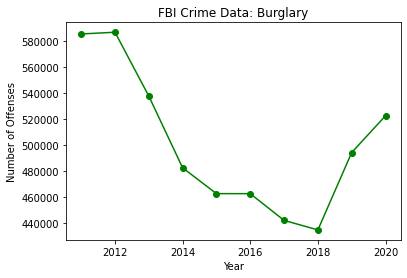

In [78]:
#formatting the dataframe, Jamie's code (used in line plot)
fig,ax=plt.subplots()

ax.plot(fbi_burglary_ct_df_set["Year(B)"], fbi_burglary_ct_df_set["Offense Count(B)"], marker = 'o',  color = 'green')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Offenses")
ax.set_title('FBI Crime Data: Burglary')

plt.show()

In [79]:
#robbery, count
fbi_robbery_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/robbery/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_robbery_ct = json.loads(fbi_robbery_ct.text)

In [80]:
#cleaning and reformatting the data, Heather's code (used in stacked bar graph)
raw_fbi_robbery_ct = []
raw_fbi_robbery_ct.append(fbi_json_robbery_ct)
fbi_unformed_robbery_ct = pd.json_normalize(raw_fbi_robbery_ct, record_path = ["results"])
fbi_unformed_robbery_ct.to_csv('fbi_unformed_robbery_ct_csv.csv')

In [81]:
#formatting the dataframe, Heather's code (used in stacked bar graph)
fbi_robbery_ct_df = pd.read_csv('fbi_unformed_robbery_ct_csv.csv')
fbi_robbery_ct_df = fbi_robbery_ct_df[["offense_count", "data_year"]]
fbi_robbery_ct_df.rename(columns={"data_year":"Year(R)", "offense_count":"Offense Count(R)"}, inplace=True)
fbi_robbery_ct_df_srt = fbi_robbery_ct_df.sort_values("Year(R)")
fbi_robbery_ct_df_set = fbi_robbery_ct_df_srt[fbi_robbery_ct_df_srt["Year(R)"] > 2010]
fbi_robbery_ct_df_set

,Offense Count(R),Year(R)
15,72942,2011
3,74626,2012
26,72200,2013
23,68471,2014
25,70713,2015
10,73328,2016
4,72311,2017
28,78559,2018
19,95627,2019
20,102677,2020


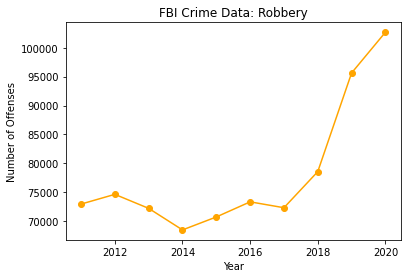

In [82]:
#formatting the dataframe, Jamie's code (used in line plot)
fig,ax=plt.subplots()

ax.plot(fbi_robbery_ct_df_set["Year(R)"], fbi_robbery_ct_df_set["Offense Count(R)"], marker = 'o',  color = 'orange')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Offenses")
ax.set_title('FBI Crime Data: Robbery')

plt.show()

In [83]:
#larceny, count
fbi_larceny_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/larceny-theft-offenses/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_larceny_ct = json.loads(fbi_larceny_ct.text)

In [84]:
#cleaning and reformatting the data, Heather's code (used in stacked bar graph)
raw_fbi_larceny_ct = []
raw_fbi_larceny_ct.append(fbi_json_larceny_ct)
fbi_unformed_larceny_ct = pd.json_normalize(raw_fbi_larceny_ct, record_path = ["results"])
fbi_unformed_larceny_ct.to_csv('fbi_unformed_larceny_ct_csv.csv')

In [85]:
#formatting the dataframe, Heather's code (used in stacked bar graph)
fbi_larceny_ct_df = pd.read_csv('fbi_unformed_larceny_ct_csv.csv')
fbi_larceny_ct_df = fbi_larceny_ct_df[["offense_count", "data_year"]]
fbi_larceny_ct_df.rename(columns={"data_year":"Year(L)", "offense_count":"Offense Count(L)"}, inplace=True)
fbi_larceny_ct_df_srt = fbi_larceny_ct_df.sort_values("Year(L)")
fbi_larceny_ct_df_final = fbi_larceny_ct_df_srt.groupby("Year(L)").sum()
fbi_larceny_ct_df_final.reset_index()
fbi_larceny_ct_df_final.reset_index(inplace = True) 
fbi_larceny_ct_df_final_set = fbi_larceny_ct_df_final[fbi_larceny_ct_df_final["Year(L)"] > 2010]
fbi_larceny_ct_df_final_set

,Year(L),Offense Count(L)
20,2011,1715009
21,2012,1792213
22,2013,1760951
23,2014,1722483
24,2015,1741204
25,2016,1789788
26,2017,1816210
27,2018,1902857
28,2019,2271350
29,2020,2453533


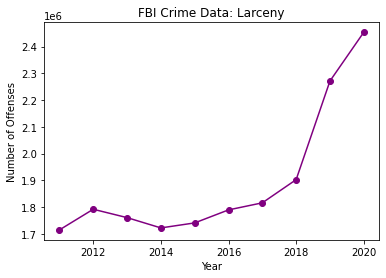

In [86]:
#formatting the dataframe, Jamie's code (used in line plot)
fig,ax=plt.subplots()

ax.plot(fbi_larceny_ct_df_final_set["Year(L)"], fbi_larceny_ct_df_final_set["Offense Count(L)"], marker = 'o',  color = 'purple')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Offenses")
ax.set_title('FBI Crime Data: Larceny')

plt.show()

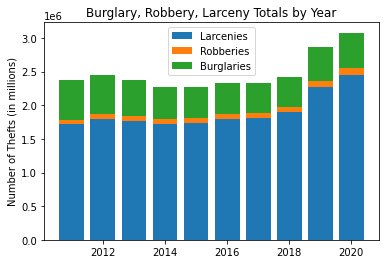

In [87]:
#merging databases
#merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')
fbi_twototals_df = pd.merge(left=fbi_larceny_ct_df_final_set, right=fbi_robbery_ct_df_set, left_on='Year(L)', right_on='Year(R)') 
fbi_totals_df = pd.merge(left=fbi_twototals_df, right=fbi_burglary_ct_df_set, left_on='Year(L)', right_on='Year(B)')
fbi_totals_df = fbi_totals_df[['Year(L)', 'Offense Count(L)', 'Offense Count(R)', 'Offense Count(B)']]
fbi_totals_df

#plotting the data
fig,ax=plt.subplots()
ax.bar(fbi_totals_df["Year(L)"], fbi_totals_df["Offense Count(L)"], label="Larcenies")
ax.bar(fbi_totals_df["Year(L)"], fbi_totals_df["Offense Count(R)"], bottom=fbi_totals_df["Offense Count(L)"], label="Robberies")
ax.bar(fbi_totals_df["Year(L)"], fbi_totals_df["Offense Count(B)"], bottom = fbi_totals_df["Offense Count(L)"]+fbi_totals_df["Offense Count(R)"], label = "Burglaries")

ax.set_title("Burglary, Robbery, Larceny Totals by Year")
#ax.set_xticklabels(fbi_totals_df["Year(L)"], rotation=90)
ax.set_ylabel("Number of Thefts (in millions)")
ax.legend()

plt.show()

In [88]:
#API call - BLS
base_url="https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey="+BLS_api_key+"&catalog=false&startyear=2011&endyear=2020&calculations=true&annualaverage=true&aspects=true"

new_list =[]

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2011", "endyear":"2020"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
bls_json_unemp_ct = json.loads(p.text)
for series in bls_json_unemp_ct['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
            unemp_list=[seriesId,year,period,value,footnotes[0:-1]]
            new_list.append(unemp_list)
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

    
unemp_df=pd.DataFrame(new_list)
unemp_df=unemp_df.rename(columns={0:'seriesID',1:'year',2:'month',3:'rate', 4:'footnotes'})
unemp_df.to_csv('unemp_df_csv.csv') 
print(unemp_df)

        seriesID  year month rate footnotes
0    LNS14000000  2020   M12  6.7          
1    LNS14000000  2020   M11  6.7          
2    LNS14000000  2020   M10  6.9          
3    LNS14000000  2020   M09  7.8          
4    LNS14000000  2020   M08  8.4          
..           ...   ...   ...  ...       ...
115  LNS14000000  2011   M05  9.0          
116  LNS14000000  2011   M04  9.1          
117  LNS14000000  2011   M03  9.0          
118  LNS14000000  2011   M02  9.0          
119  LNS14000000  2011   M01  9.1          

[120 rows x 5 columns]


In [89]:
convert_dict = {'year': int,
                'rate': float}
unemp_df = unemp_df.astype(convert_dict)
unemp_mean=unemp_df.groupby(['year'])['rate'].mean().reset_index()
print(unemp_mean)

   year      rate
0  2011  8.933333
1  2012  8.075000
2  2013  7.358333
3  2014  6.158333
4  2015  5.275000
5  2016  4.875000
6  2017  4.350000
7  2018  3.891667
8  2019  3.683333
9  2020  8.108333


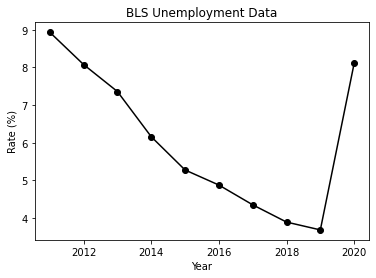

In [90]:
#formatting the dataframe, Jamie's code (used in line plot)
fig,ax=plt.subplots()

ax.plot(unemp_mean["year"], unemp_mean["rate"], marker = 'o',  color = 'black')
ax.set_xlabel("Year")
ax.set_ylabel("Rate (%)")
ax.set_title('BLS Unemployment Data')

plt.show()